# HarvestStat Data Analysis - Somalia

## Validation with FAOSTAT and CHIRPS Precipitation

### Gu season

Gu-Maize Correlation:
          FSNAU        HS      PRCP
FSNAU  1.000000  0.980321  0.259257
HS     0.980321  1.000000  0.185664
PRCP   0.259257  0.185664  1.000000


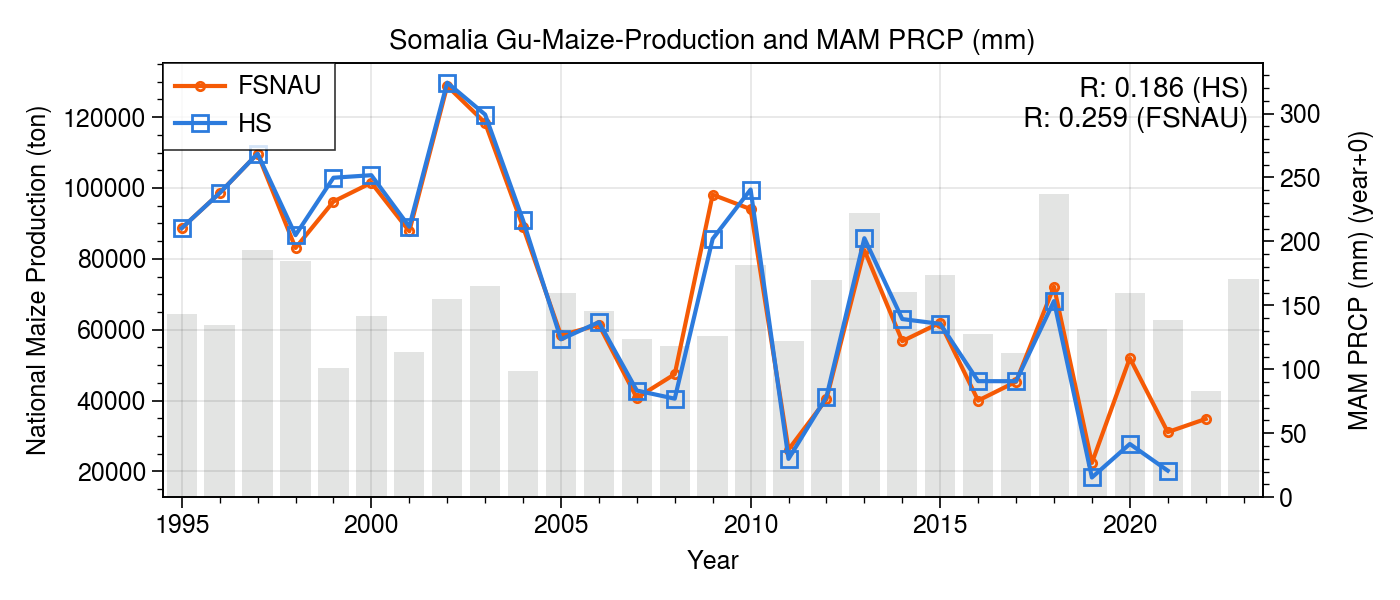

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplot
# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fsnau,  = 'Somalia', 'Gu', 'Maize', 'Maize'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'SO1990A0', 3, 'MAM PRCP (mm)', +0
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FSNAU
df = pd.read_csv('../data/crop/fsnau_data_stable.csv', index_col=0)
df = df[
    (df['season_name'] == season_name) &
    (df['product'] == product_name_fsnau)
]
df['year'] = df['planting_year']
data_fsnau = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FSNAU')
# Merge
data = pd.concat([data_fsnau, data_hs], axis=1, keys=['FSNAU','HS']).sort_index()
data = data.reindex(np.array(range(1995,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
fn = '../data/prcp_chirps-v2.hdf'
prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
prcp_nat.name = 'PRCP'
prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
ax1.set_xlabel('Year')
ax1.set_ylabel('National Maize Production (ton)')
ax1.patch.set_facecolor('white')
# Precipitation
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
ax2.grid(False)
ax1.set_zorder(1)  
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(loc='upper left')
ax1.annotate(
    'R: %.3f (HS)\nR: %.3f (FSNAU)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FSNAU','PRCP']), 
    xy=(1, 1.0), xycoords='axes fraction', fontsize=10,
    xytext=(-5, -5), textcoords='offset points',
    ha='right', va='top'
)
title = f'{country_name} {season_name}-{product_name_fdw}-Production and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #

### Deyr season

Deyr-Maize Correlation:
          FSNAU        HS      PRCP
FSNAU  1.000000  0.535316  0.024038
HS     0.535316  1.000000  0.157540
PRCP   0.024038  0.157540  1.000000


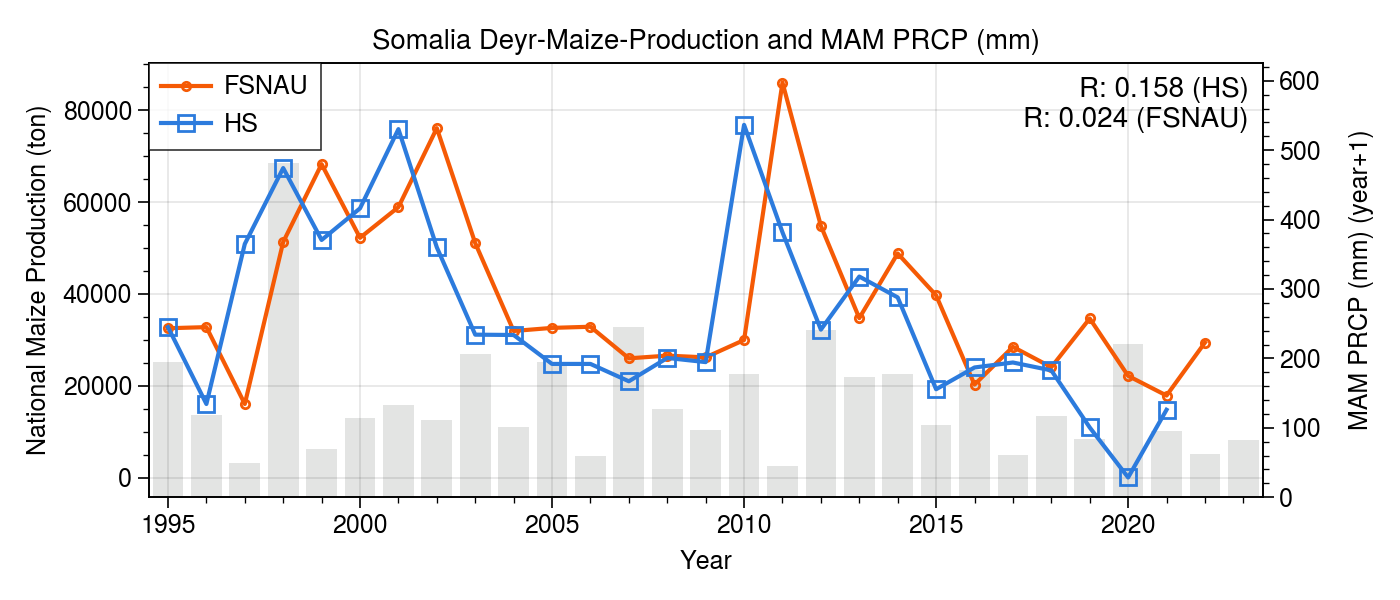

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplot
# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fsnau,  = 'Somalia', 'Deyr', 'Maize', 'Maize'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'SO1990A0', 10, 'MAM PRCP (mm)', +1
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FSNAU
df = pd.read_csv('../data/crop/fsnau_data_stable.csv', index_col=0)
df = df[
    (df['season_name'] == season_name) &
    (df['product'] == product_name_fsnau)
]
df['year'] = df['planting_year']
data_fsnau = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FSNAU')
# Merge
data = pd.concat([data_fsnau, data_hs], axis=1, keys=['FSNAU','HS']).sort_index()
data = data.reindex(np.array(range(1995,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
fn = '../data/prcp_chirps-v2.hdf'
prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
prcp_nat.name = 'PRCP'
prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
ax1.set_xlabel('Year')
ax1.set_ylabel('National Maize Production (ton)')
ax1.patch.set_facecolor('white')
# Precipitation
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
ax2.grid(False)
ax1.set_zorder(1)  
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(loc='upper left')
ax1.annotate(
    'R: %.3f (HS)\nR: %.3f (FSNAU)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FSNAU','PRCP']), 
    xy=(1, 1.0), xycoords='axes fraction', fontsize=10,
    xytext=(-5, -5), textcoords='offset points',
    ha='right', va='top'
)
title = f'{country_name} {season_name}-{product_name_fdw}-Production and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #

## Validation with FSNAU data

### Gu season

Gu-Maize Correlation:
           FAO        HS      PRCP
FAO   1.000000  0.758982 -0.015923
HS    0.758982  1.000000  0.185664
PRCP -0.015923  0.185664  1.000000


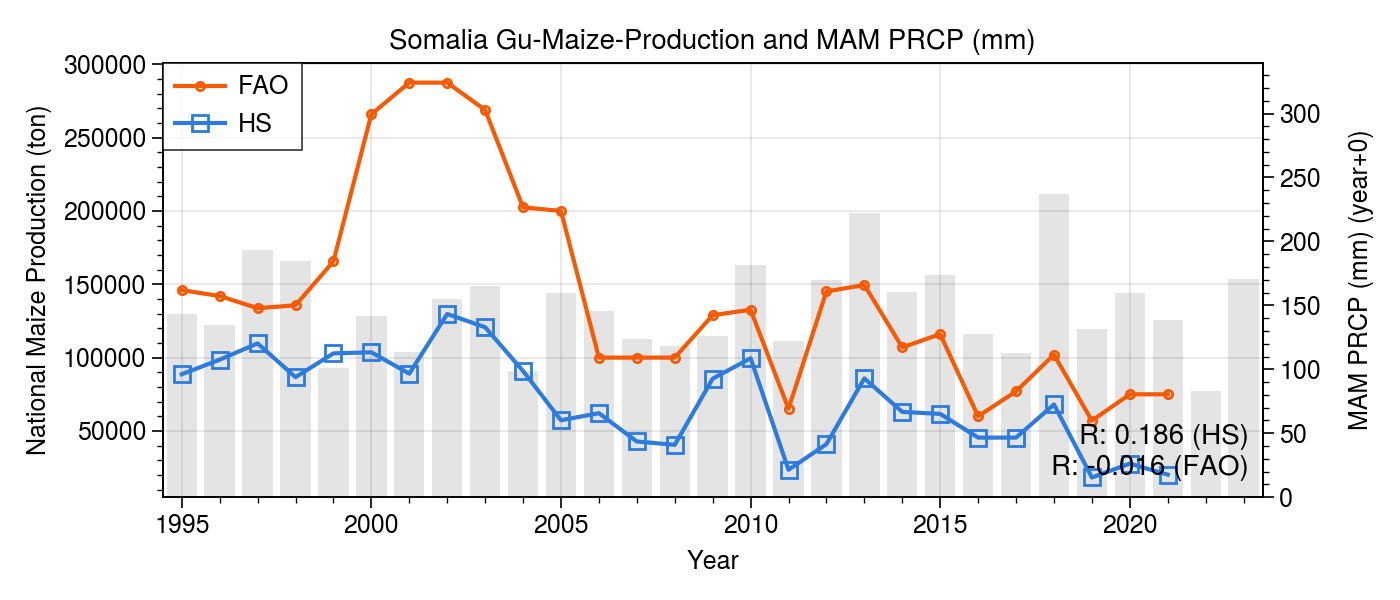

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as pplot
# Load Crop Data ------------------------------------- #
country_name, season_name, product_name_fdw, product_name_fao,  = 'Somalia', 'Gu', 'Maize', 'Maize (corn)'
shape_code, prcp_start_month, prcp_season_name, prcp_year_offset = 'SO1990A0', 3, 'MAM PRCP (mm)', +0
# HarvestStat
df = pd.read_csv('../public/hvstat_data.csv', index_col=0)
df = df[
    (df['country'] == country_name) &
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name_fdw])) &
    (df['indicator'] == 'production')
].copy()
df['year'] = df['harvest_year']
data_hs = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').squeeze()
# FAO-STAT
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['cnt_name'] == country_name) &
    (df['cpc2_name'] == product_name_fao) &
    (df['indicator'] == 'Production')
].set_index('year')['value']
# Merge
data = pd.concat([data_fao,data_hs], axis=1, keys=['FAO','HS']).sort_index()
data = data.reindex(np.array(range(1995,2024)))
# ---------------------------------------------------- #
# Load precipitation --------------------------------- #
fn = '../data/prcp_chirps-v2.hdf'
prcp_nat = pd.read_hdf(fn)[shape_code].resample('1M').agg('sum')
prcp_nat.index = prcp_nat.index.map(lambda x: x.replace(day=1))
prcp_nat.name = 'PRCP'
prcp_nat.index = prcp_nat.index + pd.DateOffset(years=prcp_year_offset)
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name_fdw} Correlation:\n{corr_value}')
# ---------------------------------------------------- #
# Comparison with Precipitation ---------------------- #
fig, ax1 = plt.subplots(figsize=(7,3))
fig.set_facecolor('white')
data.plot(ax=ax1, grid=True, markerfacecolor='None',color=['#F55A05','#2C7BDD'])
marker = ['.','s']
for i, line in enumerate(ax1.get_lines()):
    line.set_marker(marker[i])
# years = data.index
# ax1.set_xticks(years)
# ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.set_xlim([data.index[0]-0.5, data.index[-1]+0.5])
ax1.set_xlabel('Year')
ax1.set_ylabel('National Maize Production (ton)')
ax1.patch.set_facecolor('white')
# Precipitation
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label + ' (year+%d)'%prcp_year_offset, labelpad=10)
ax2.grid(False)
ax1.set_zorder(1)  
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(loc='upper left')
ax1.annotate(
    'R: %.3f (HS)\nR: %.3f (FAO)' % (corr_value.loc['HS','PRCP'], corr_value.loc['FAO','PRCP']), 
    xy=(1, 0.2), xycoords='axes fraction', fontsize=10,
    xytext=(-5, -5), textcoords='offset points',
    ha='right', va='top'
)
title = f'{country_name} {season_name}-{product_name_fdw}-Production and {prcp_label}'
ax1.set_title(title)
fig.tight_layout()
plt.show()
# ---------------------------------------------------- #

### Deyr-season Production

Gu-Maize Correlation:
            FDW     FSNAU      PRCP
FDW    1.000000  0.979997  0.190846
FSNAU  0.979997  1.000000  0.261448
PRCP   0.190846  0.261448  1.000000


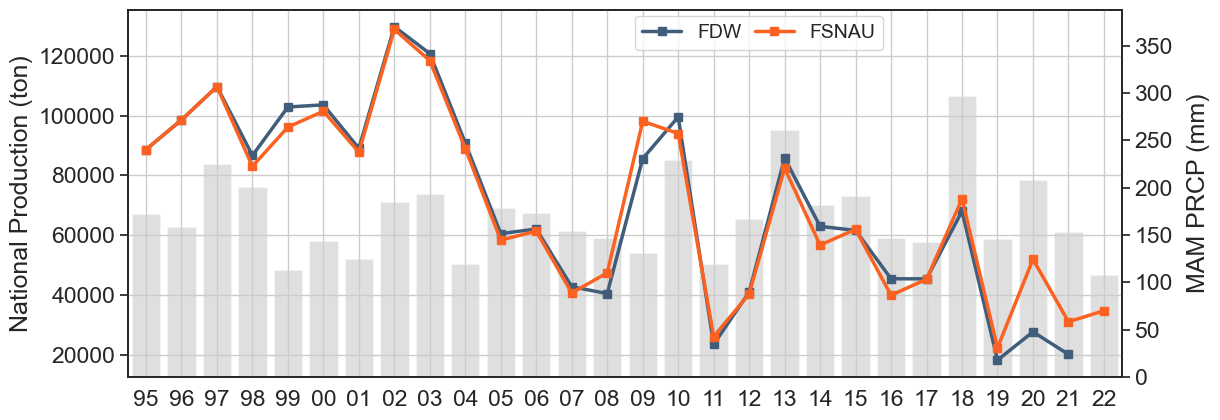

In [2]:
# Load GSCD crop data -------------------------------- #
country_iso, country_name = 'SO', 'Somalia'
df = pd.read_hdf('../data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
# Deyr-season
# season_name, product_name, prcp_start_month, prcp_season_name = 'Deyr', 'Sorghum', 10, 'OND PRCP (mm)'
# season_name, product_name, prcp_start_month, prcp_season_name = 'Deyr', 'Maize', 10, 'OND PRCP (mm)'
season_name, product_name, prcp_start_month, prcp_season_name = 'Gu', 'Maize', 3, 'MAM PRCP (mm)'
# season_name, product_name, prcp_start_month, prcp_season_name = 'Gu', 'Sorghum', 3, 'MAM PRCP (mm)'
df = df[
    (df['season_name'] == season_name) &
    (df['product'].isin([product_name])) &
    (df['indicator'] == 'production')
]
df['year'] = df['planting_year']
data_fdw = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FDW')
# ---------------------------------------------------- #

# Load FSNAU crop data ------------------------------- #
df = pd.read_csv('../public/fsnau_data_stable.csv', index_col=0)
df = df[
    (df['season_name'] == season_name) &
    (df['product'] == product_name)
]
df['year'] = df['planting_year']
data_fsnau = df.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FSNAU')
# ---------------------------------------------------- #
data = pd.concat([data_fdw, data_fsnau], axis=1, keys=['FDW','FSNAU']).sort_index()

# Load precipitation --------------------------------- #
prcp = pd.read_hdf('../data/adm.prcp.chirps-v2.crop.extended.hdf')[fnids]
prcp = prcp.resample('1M').agg('sum')
prcp.index = prcp.index.map(lambda x: x.replace(day=1))
assert prcp.isna().sum().sum() == 0 # if not, use FillMissMonthMean
# National seasonal precipitation
prcp_nat = prcp.mean(1).rename('PRCP')
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat = prcp_nat[prcp_nat.index.month == prcp_start_month]                      # Start month
prcp_nat = prcp_nat.groupby(prcp_nat.index.year).sum()
prcp_label = prcp_season_name
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'{season_name}-{product_name} Correlation:\n{corr_value}')
# ---------------------------------------------------- #

# Validation figure ---------------------------------- #
years = np.arange(1995,2023)
sns.set(style="white", font_scale=1.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
data.plot(ax=ax1, legend=None, linewidth=2.5, marker='s', color=['#405E7B','#FB6222','#17AB6F'])
ax1.set_xlim([years.min()-0.5, years.max()+0.5])
ax1.set_xticks(years)
ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.xaxis.grid(True)
ax1.grid(True)
ax1.set_xlabel('')
ax1.set_ylabel('National Production (ton)')
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label, labelpad=10)
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(bbox_to_anchor=(0.5, 1.01), columnspacing=0.7, ncol=3, fontsize=14)
plt.tight_layout(pad=0)
plt.show()
# ---------------------------------------------------- #

### Deyr-season Yield

### Annual Production

In [4]:
# Load GSCD crop data -------------------------------- #
country_iso, country_name = 'SO', 'Somalia'
df = pd.read_hdf('../data/crop/adm_crop_production_%s.hdf' % country_iso)
df = df[df['gscd_code']=='calibrated']; fnids = list(df['fnid'].unique())
product_name = 'Sorghum'
product_name_fao = 'Sorghum'
# Deyr-season
data = df[
    (df['season_name'] == 'Deyr') &
    (df['product'].isin([product_name])) &
    (df['indicator'] == 'production')
]
data['year'] = data['harvest_year']
data_deyr = data.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FDW')
# Gu-season
data = df[
    (df['season_name'] == 'Gu') &
    (df['product'].isin([product_name])) &
    (df['indicator'] == 'production')
]
data['year'] = data['planting_year']
data_gu = data.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FDW')
# Aggregation
data_fdw = pd.concat([data_deyr, data_gu],axis=1).sum(1).sort_index()
# ---------------------------------------------------- #

# Load FSNAU crop data ------------------------------- #
df = pd.read_csv('../public/fsnau_data_stable.csv', index_col=0)
# Deyr-season
data = df[
    (df['season_name'] == 'Deyr') &
    (df['product'] == product_name)
]
data['year'] = data['harvest_year']
data_deyr = data.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FSNAU')
# Gu-season
data = df[
    (df['season_name'] == 'Gu') &
    (df['product'] == product_name)
]
data['year'] = data['harvest_year']
data_gu = data.pivot_table(index='year',columns='product',values='value',aggfunc='sum').sum(1).rename('FSNAU')
# Aggregation
data_fsnau = pd.concat([data_deyr, data_gu],axis=1).sum(1).sort_index()
# ---------------------------------------------------- #

# Load FAO-STAT National Production Data ------------- #
df = pd.read_csv('../data/crop/adm_fao_stat.csv', index_col=0)
data_fao = df[
    (df['cnt_name'] == 'Somalia') &
    (df['cpc2_name'] == product_name_fao) &
    (df['indicator'] == 'Production')
].set_index('year')['value']
# ---------------------------------------------------- #

# # Load FAO-AgroMaps Subnational Production Data ------ #
# df = pd.read_csv('./data/crop/adm_fao_agromaps.csv', index_col=0, low_memory=False)
# data_fao2 = df[
#     (df['cnt_name'] == 'Somalia') &
#     (df['cpc2_name'] == 'Maize (corn)') &
#     (df['adm_level'] == 2) &
#     (df['indicator'] == 'Production')
# ].pivot_table(index='year',columns='admx_code',values='value')
# # print(data_fao2)
# # data_fao2.index = data_fao2.index - 1
# data_fao2 = data_fao2.sum(1)
# # ---------------------------------------------------- #

data = pd.concat([data_fdw, data_fsnau, data_fao], axis=1, keys=['FDW','FSNAU','FAO']).sort_index()
data.tail()

,FDW,FSNAU,FAO
year,,,
2019,103096.45,112559.45,125000.0
2020,114959.20,115797.31,100000.0
2021,41479.50,90226.65,NaN
2022,24609.00,58078.25,NaN
2023,NaN,37729.90,NaN


Annual-Sorghum Correlation:
            FDW     FSNAU       FAO      PRCP
FDW    1.000000  0.955203  0.666453  0.297390
FSNAU  0.955203  1.000000  0.659819  0.233918
FAO    0.666453  0.659819  1.000000 -0.030247
PRCP   0.297390  0.233918 -0.030247  1.000000


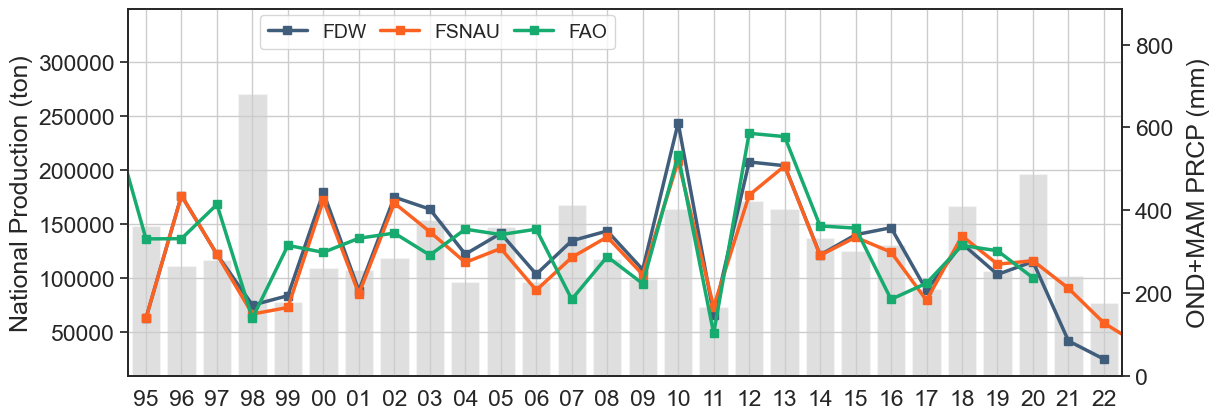

In [5]:
# Load precipitation --------------------------------- #
prcp = pd.read_hdf('../data/adm.prcp.chirps-v2.crop.extended.hdf')[fnids]
prcp = prcp.resample('1M').agg('sum')
prcp.index = prcp.index.map(lambda x: x.replace(day=1))
assert prcp.isna().sum().sum() == 0 # if not, use FillMissMonthMean
# National seasonal precipitation
prcp_nat = prcp.mean(1).rename('PRCP')
# Forward rolling summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)   # Forward Rolling Window
prcp_nat = prcp_nat.rolling(window=indexer, min_periods=3).sum()
prcp_nat1 = prcp_nat[prcp_nat.index.month == 10]                      # Start month
prcp_nat1 = prcp_nat1.groupby(prcp_nat1.index.year).sum()
prcp_nat1.index += 1
prcp_nat2 = prcp_nat[prcp_nat.index.month == 3]                      # Start month
prcp_nat2 = prcp_nat2.groupby(prcp_nat2.index.year).sum()
prcp_nat = prcp_nat1 + prcp_nat2
prcp_nat = prcp_nat[prcp_nat.notna()]
prcp_label = 'OND+MAM PRCP (mm)'
# Correlations
corr_value = pd.concat([data,prcp_nat],axis=1).corr()
print(f'Annual-{product_name} Correlation:\n{corr_value}')
# # ---------------------------------------------------- #

# Validation figure ---------------------------------- #
years = np.arange(1995,2023)
sns.set(style="white", font_scale=1.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
data.plot(ax=ax1, legend=None, linewidth=2.5, marker='s', color=['#405E7B','#FB6222','#17AB6F'])
ax1.set_xlim([years.min()-0.5, years.max()+0.5])
ax1.set_xticks(years)
ax1.set_xticklabels(['%02d'% yr for yr in np.mod(years,100)])
ax1.xaxis.grid(True)
ax1.grid(True)
ax1.set_xlabel('')
ax1.set_ylabel('National Production (ton)')
year, value = prcp_nat.index, prcp_nat.values
ax2 = ax1.twinx()
plt.bar(year, value, alpha=.25, color='grey')
ax2.set_ylim([0, value.max()*1.3])
ax2.set_ylabel(prcp_label, labelpad=10)
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax1.legend(bbox_to_anchor=(0.5, 1.01), columnspacing=0.7, ncol=3, fontsize=14)
plt.tight_layout(pad=0)
plt.show()
# ---------------------------------------------------- #

## Validation with FAOSTAT and CHIRPS Precipitation